# Simple test for Jax

- author Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : 2023/10/26
- last update : 2023/10/26

- see tutorial : https://theoryandpractice.org/stats-ds-book/autodiff-tutorial.html

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

# to enlarge the sizes
params = {'legend.fontsize': 'large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)


In [2]:
from diffemulator.diffemulator import SimpleDiffAtmEmulator, Dict_Of_sitesAltitudes,Dict_Of_sitesPressures
from diffemulator.interpolate import RegularGridInterpolator

In [3]:
from jax import make_jaxpr
import jax.numpy as jnp
import numpy as np
from jax import grad, jit, vmap,jacobian,jacfwd

In [4]:
site = 'LSST'
emul  = SimpleDiffAtmEmulator(obs_str=site)

Observatory LSST found in preselected observation sites


I0000 00:00:1698348690.812491       1 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


## Rayleigh Scattering

### Call directly Regular Grid Interpolator emul.func_rayleigh

In [5]:
ams = np.linspace(emul.AIRMASSMIN,emul.AIRMASSMAX,100)

In [6]:
pts = jnp.meshgrid(emul.WL,ams)

In [7]:
pts_stacked = jnp.dstack(pts)

In [8]:
pts_stacked.shape

(100, 800, 2)

In [9]:
array = emul.func_rayleigh(pts_stacked)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


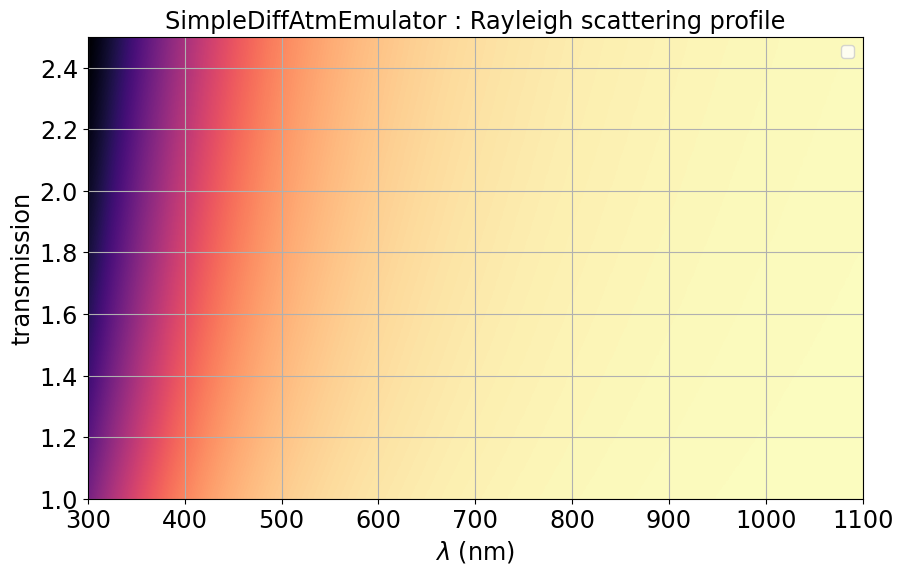

In [10]:
fig, ax = plt.subplots()
ax.imshow(array,origin="lower",cmap=plt.cm.magma,extent=(emul.WLMIN,emul.WLMAX,emul.AIRMASSMIN,emul.AIRMASSMAX),aspect='auto')
title = f"SimpleDiffAtmEmulator : Rayleigh scattering profile"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()

### Call the interpolation through the class method emul.GetRayleighTransparency(emul.WL,ams)

In [11]:
val = array = emul.GetRayleighTransparency2D_v2(emul.WL[0],ams[0])

In [12]:
array = emul.GetRayleighTransparency2D(emul.WL,ams)

In [13]:
array.shape

(100, 800)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


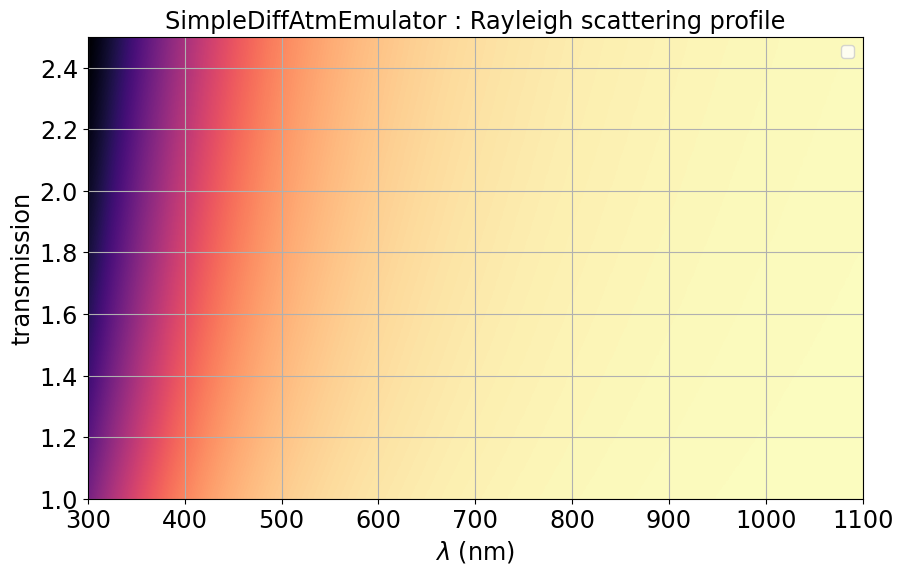

In [14]:
fig, ax = plt.subplots()
ax.imshow(array,origin="lower",cmap=plt.cm.magma,extent=(emul.WLMIN,emul.WLMAX,emul.AIRMASSMIN,emul.AIRMASSMAX),aspect='auto')
title = f"SimpleDiffAtmEmulator : Rayleigh scattering profile"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()

In [15]:
array.shape

(100, 800)

### Call the derivative emul.DiffGetRayleighTransparency(emul.WL,ams)

In [16]:
transm = emul.GetRayleighTransparency2D_v2(400.,1.)

In [17]:
transm

Array(0.77069813, dtype=float32)

In [18]:
dtransm = emul.DiffGetRayleighTransparency2D_v2(emul.WL[0],ams[0])

In [19]:
dtransm

(Array(0.00496571, dtype=float32), Array(-0.349386, dtype=float32))

In [20]:
dtransm = emul.DiffGetRayleighTransparency2D(emul.WL,ams)

In [21]:
dtransm[0].shape

(100, 800, 800)

In [22]:
dtransm[1].shape

(100, 800, 100)

## O2 absorption

In [23]:
array = emul.func_O2abs(pts_stacked)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


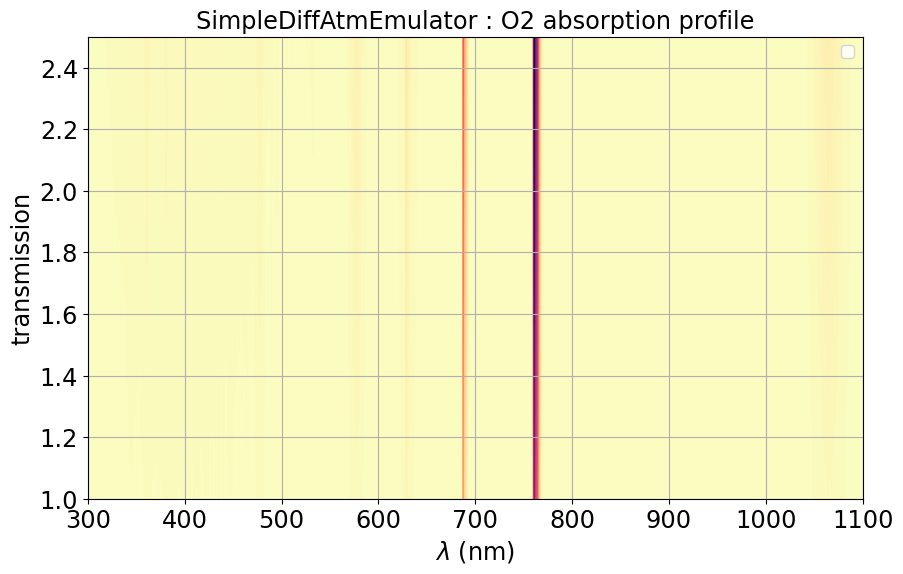

In [24]:
fig, ax = plt.subplots()
ax.imshow(array,origin="lower",cmap=plt.cm.magma,extent=(emul.WLMIN,emul.WLMAX,emul.AIRMASSMIN,emul.AIRMASSMAX),aspect='auto')
title = f"SimpleDiffAtmEmulator : O2 absorption profile"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()

In [25]:
array = emul.GetO2absTransparency2D(emul.WL,ams)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


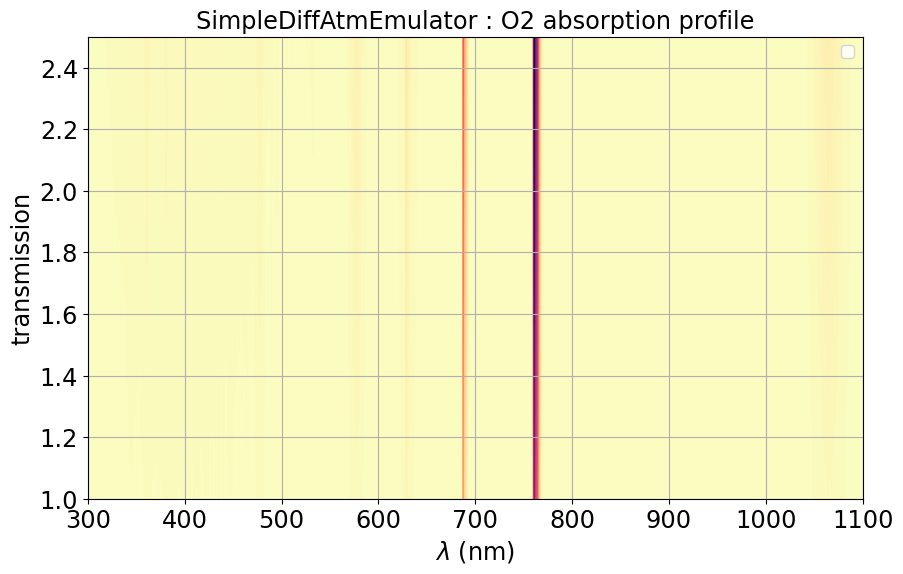

In [26]:
fig, ax = plt.subplots()
ax.imshow(array,origin="lower",cmap=plt.cm.magma,extent=(emul.WLMIN,emul.WLMAX,emul.AIRMASSMIN,emul.AIRMASSMAX),aspect='auto')
title = f"SimpleDiffAtmEmulator : O2 absorption profile"
ax.set_title(title)
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("transmission")
# place a text box in upper left in axes coords
#ax.text(0.5, 0.05, textboxstr, transform=ax.transAxes, fontsize=14,verticalalignment='bottom', bbox=textboxprops)
ax.grid()
ax.legend()